In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from datetime import datetime

In [62]:
import seaborn as sns

In [2]:
# importing training data
data=pd.read_csv("train.csv")

In [31]:
# importing testing data
da=pd.read_csv("test.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  33666

In [5]:
data.describe(include='all')

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
count,341424,341424,341424,341424,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,...,336660.000000,341424.000000,341424.000000,341424,341424.000000,341424,341424,341424,341424,341424.000000
unique,341424,1621,1532,1531,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10,NaN,101327,6,4,32,NaN
top,0ef8cf2d9f1f889c84beef010a6afbbf871362ca05eded...,02/09/16,08/10/16,21/10/18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,D,NaN,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,F,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,NaN
freq,1,1353,460,491,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67618,NaN,50,120623,312481,35331,NaN
mean,NaN,NaN,NaN,NaN,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,...,7.260708,4.763303,3.193390,NaN,1.124209,NaN,NaN,NaN,NaN,7.720801
std,NaN,NaN,NaN,NaN,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,...,4.701283,3.103909,1.167824,NaN,0.329821,NaN,NaN,NaN,NaN,1.090109
min,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,...,1.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.600397
25%,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,...,4.000000,2.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,7.187260
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,...,8.000000,5.000000,3.000000,NaN,1.000000,NaN,NaN,NaN,NaN,7.860814
75%,NaN,NaN,NaN,NaN,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,...,8.000000,7.000000,4.000000,NaN,1.000000,NaN,NaN,NaN,NaN,8.419144


In [7]:
data.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [8]:
data.head(10)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01/12/15,12/01/16,13/01/16,1,1,2,0,47,1,...,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.167707
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20/01/16,20/01/16,21/01/16,3,1,2,0,46,2,...,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,6.449838
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22/08/16,20/10/16,25/10/16,1,1,2,2,46,1,...,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.046172
8,3706793a0263706fe541b6e7f3b681be363f0b7e2bdc63...,10/09/16,18/09/16,24/09/16,1,1,2,0,45,2,...,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,0b918943df0962bc7a1824c0555a389347b4febdc7cf9d...,5.394203
9,1f797a715ff7788cc8162fb033ee0eca345a2209b27593...,03/08/16,21/11/16,24/11/16,1,1,2,0,45,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,6.561412


In [32]:
da.isnull().sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

In [33]:
da.describe(include="all")

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
count,146765,146765,146765,146765,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,...,146730.000000,144505.000000,146765.000000,146765.000000,146765,146765.000000,146765,146765,146765,146765
unique,146765,1619,1523,1524,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10,NaN,43496,6,3,32
top,e89b9819f543ec3ebf077a3f97836749591d7bbf59c997...,02/09/16,05/01/19,21/10/18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,E,NaN,decb017fcb0689095a8e32335fa6e6becf2958cd4c4143...,F,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
freq,1,599,210,215,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28941,NaN,37,52147,134262,15397
mean,NaN,NaN,NaN,NaN,1.902068,2.204483,3.275897,0.362287,209.179852,1.774101,...,2.681088,7.254206,4.750560,3.188410,NaN,1.123354,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.914653,0.817804,1.783842,0.758218,862.926844,0.753281,...,0.882366,4.755982,3.101036,1.163872,NaN,0.328844,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,...,3.000000,8.000000,5.000000,3.000000,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,...,3.000000,8.000000,7.000000,4.000000,NaN,1.000000,NaN,NaN,NaN,NaN


# Data Cleaning and Missing Values

In [9]:
#missing values
data['state_code_residence'].unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 33., 29., 37., 35., 36., 38.])

In [10]:
# Point to be noted the unique values had every single value range from 1 to 38 except 17 therefore replacing the nan by 17

In [11]:
data['state_code_residence']=data['state_code_residence'].fillna(17.0)

In [34]:
da['state_code_residence']=da['state_code_residence'].fillna(17.0)

In [14]:
data['season_holidayed_code'].value_counts()
# replacing the nan by 2.0 as mode

2.0    126771
3.0    118187
4.0     69387
1.0     26965
Name: season_holidayed_code, dtype: int64

In [35]:
da['season_holidayed_code']=da['season_holidayed_code'].fillna(2.0)

In [15]:
data['season_holidayed_code']=data['season_holidayed_code'].fillna(2.0)

# Mapping of object into Numerical

In [16]:
data['member_age_buckets'].unique()

array(['F', 'H', 'D', 'E', 'I', 'G', 'C', 'B', 'A', 'J'], dtype=object)

In [17]:
data['member_age_buckets']=data['member_age_buckets'].map({'F':1, 'E':2, 'D':3, 'B':4, 'A':5, 'C':6,'G':7,'H':8,'I':9,'J':10})

In [36]:
da['member_age_buckets']=da['member_age_buckets'].map({'F':1, 'E':2, 'D':3, 'B':4, 'A':5, 'C':6,'G':7,'H':8,'I':9,'J':10})

In [18]:
data['cluster_code'].unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [19]:
data['cluster_code']=data['cluster_code'].map({'F':1, 'E':2, 'D':3, 'B':4, 'A':5, 'C':6})

In [37]:
da['cluster_code']=da['cluster_code'].map({'F':1, 'E':2, 'D':3, 'B':4, 'A':5, 'C':6})

In [20]:
data['reservationstatusid_code'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [21]:
data['reservationstatusid_code']=data['reservationstatusid_code'].map({'C':1, 'A':2, 'B':3, 'D':4})

In [38]:
da['reservationstatusid_code']=da['reservationstatusid_code'].map({'C':1, 'A':2, 'B':3, 'D':4})

In [22]:
data['resort_id'].unique()

array(['4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce',
       '39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9',
       '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790',
       'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
       'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9',
       'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a',
       '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9',
       'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b',
       '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8',
       '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a',
       '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683',
       '624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4',
       '3e1e967e9b793e908

In [23]:
data['resort_id']=data['resort_id'].map({'4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce':1,
       '39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9':2,
       '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790':3,
       'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35':4,
       'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9':5,
       'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a':6,
       '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9':7,
       'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b':8,
       '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8':9,
       '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a':10,
       '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8':11,
       'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683':12,
       '624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4':13,
       '3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b462bd9994537bfe15c':14,
       '9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e5ff3827ffb3634953':15,
       'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b':16,
       'da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c':17,
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767':18,
       '48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc':19,
       '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b':20,
       '670671cd97404156226e507973f2ab8330d3022ca96e0c93bdbdb320c41adcaf':21,
       'f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a8143301782de13da2d9202b':22,
       'c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894':23,
       '81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a':24,
       'c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4':25,
       '7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451':26,
       '6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6':27,
       'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d':28,
       '8722616204217eddb39e7df969e0698aed8e599ba62ed2de1ce49b03ade0fede':29,
       '3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278':30,
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a':31,
       '98a3ab7c340e8a033e7b37b6ef9428751581760af67bbab2b9e05d4964a8874a':32})

In [39]:
da['resort_id']=da['resort_id'].map({'4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce':1,
       '39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9':2,
       '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790':3,
       'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35':4,
       'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9':5,
       'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a':6,
       '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9':7,
       'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b':8,
       '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8':9,
       '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a':10,
       '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8':11,
       'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683':12,
       '624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4':13,
       '3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b462bd9994537bfe15c':14,
       '9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e5ff3827ffb3634953':15,
       'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b':16,
       'da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c':17,
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767':18,
       '48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc':19,
       '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b':20,
       '670671cd97404156226e507973f2ab8330d3022ca96e0c93bdbdb320c41adcaf':21,
       'f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a8143301782de13da2d9202b':22,
       'c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894':23,
       '81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a':24,
       'c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4':25,
       '7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451':26,
       '6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6':27,
       'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d':28,
       '8722616204217eddb39e7df969e0698aed8e599ba62ed2de1ce49b03ade0fede':29,
       '3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278':30,
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a':31,
       '98a3ab7c340e8a033e7b37b6ef9428751581760af67bbab2b9e05d4964a8874a':32})

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341424 non-null float64
state_code_residence                  34142

In [40]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 23 columns):
reservation_id              146765 non-null object
booking_date                146765 non-null object
checkin_date                146765 non-null object
checkout_date               146765 non-null object
channel_code                146765 non-null int64
main_product_code           146765 non-null int64
numberofadults              146765 non-null int64
numberofchildren            146765 non-null int64
persontravellingid          146765 non-null int64
resort_region_code          146765 non-null int64
resort_type_code            146765 non-null int64
room_type_booked_code       146765 non-null int64
roomnights                  146765 non-null int64
season_holidayed_code       146765 non-null float64
state_code_residence        146765 non-null float64
state_code_resort           146765 non-null int64
total_pax                   146765 non-null int64
member_age_buckets          146

# Working with dates 

In [26]:
# creating empty string to calaculate the number of days for training data
l=[]
ll=[]
# l:- stores the number of days of stay in hotel
# ll:- stores the number of days between booking and checcking in resort

In [27]:
# calculating number of days person stays in hotel for training data
for i in range(data.shape[0]):
    st1 = data['checkin_date'][i]
    st2= data['checkout_date'][i]
    datetime_ob1 = datetime.strptime(st1,'%d/%m/%y')
    datetime_ob2 = datetime.strptime(st2,'%d/%m/%y')
    k=datetime_ob2-datetime_ob1
    l.append(k.days)

In [28]:
# calculating days between booking and checking in for training data
for i in range(data.shape[0]):
    st1 = data['checkin_date'][i]
    st2= data['booking_date'][i]
    datetime_ob1 = datetime.strptime(st1, '%d/%m/%y')
    datetime_ob2 = datetime.strptime(st2, '%d/%m/%y')
    k=datetime_ob1-datetime_ob2
    ll.append(k.days)

In [29]:
# creating new dataframe m
m=pd.DataFrame({"Days_book":ll,"Days":l})

In [30]:
# using the collected feature for prediction
data['Days_Stay']=m['Days']
data['Days_book']=m['Days_book']

In [42]:
# creating empty string to calaculate the number of days for testing data
l1=[]
ll1=[]
# l1:- stores the number of days of stay in hotel
# ll1:- stores the number of days between booking and checcking in resort

In [43]:
# calculating number of days person stays in hotel for training data
for i in range(da.shape[0]):
    st1 = da['checkin_date'][i]
    st2= da['checkout_date'][i]
    datetime_ob1 = datetime.strptime(st1,'%d/%m/%y')
    datetime_ob2 = datetime.strptime(st2,'%d/%m/%y')
    k=datetime_ob2-datetime_ob1
    l1.append(k.days)

In [44]:
# calculating days between booking and checking in for training data
for i in range(da.shape[0]):
    st1 = da['checkin_date'][i]
    st2= da['booking_date'][i]
    datetime_ob1 = datetime.strptime(st1, '%d/%m/%y')
    datetime_ob2 = datetime.strptime(st2, '%d/%m/%y')
    k=datetime_ob1-datetime_ob2
    ll1.append(k.days)

In [102]:
# creating new dataframe m1 for testing data
m1=pd.DataFrame({"Days_book":ll1,"Days":l1})


In [103]:
# using the collected feature for prediction
da['Days_Stay']=m1['Days']
da['Days_book']=m1['Days_book']

# Deleting  the unnecessary data

In [104]:
data1=data.copy()
da1=da.copy()

In [105]:
del data1['reservation_id']
del data1['booking_date']
del data1['checkin_date']
del data1['checkout_date']
del data1['memberid']

In [106]:
del da1['reservation_id']
del da1['booking_date']
del da1['checkin_date']
del da1['checkout_date']
del da1['memberid']

In [107]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 21 columns):
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341424 non-null float64
state_code_residence                  341424 non-null float64
state_code_resort                     341424 non-null int64
total_pax                             341424 non-null int64
member_age_buckets                    341424 non-null int64
booking_type_code                     341424 

In [108]:
da1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 20 columns):
channel_code                146765 non-null int64
main_product_code           146765 non-null int64
numberofadults              146765 non-null int64
numberofchildren            146765 non-null int64
persontravellingid          146765 non-null int64
resort_region_code          146765 non-null int64
resort_type_code            146765 non-null int64
room_type_booked_code       146765 non-null int64
roomnights                  146765 non-null int64
season_holidayed_code       146765 non-null float64
state_code_residence        146765 non-null float64
state_code_resort           146765 non-null int64
total_pax                   146765 non-null int64
member_age_buckets          146765 non-null int64
booking_type_code           146765 non-null int64
cluster_code                146765 non-null int64
reservationstatusid_code    146765 non-null int64
resort_id                   146765 

# Visualisation  to get idea for ML model

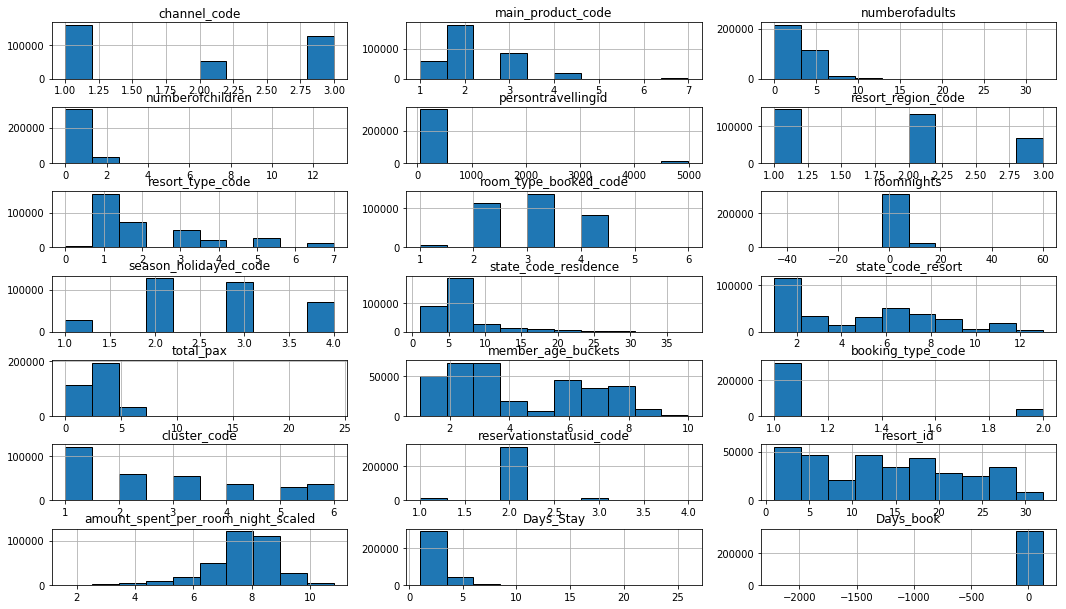

In [109]:
import itertools
columns=data1.columns[:]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data1[i].hist(bins=10,edgecolor='black')
    plt.title(i)
plt.show()

In [110]:
# Seeing via visualisation the last graph of the Days_book seems to be off so i explored it again and i found data inconsistency
# The person check in record are even before it was booked .So there are total 20 inconsistent data rows that must be erased.

In [111]:
d=data1.loc[data1['Days_book']<0]
d
# these data shows person checkin in 2012 and book resort in 2018 .maybe data entry mistake

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,...,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Days_Stay,Days_book
15,3,1,2,0,45,1,1,2,1,3.0,...,6,3,8,1,1,1,11,3.218876,3,-2219
34,3,2,3,0,45,1,1,3,2,2.0,...,1,3,3,2,2,1,19,7.029715,6,-2210
60,3,2,2,0,45,3,3,3,1,2.0,...,3,4,9,1,5,1,22,9.142010,1,-2203
79,1,3,3,1,45,3,3,2,6,2.0,...,5,3,2,1,1,2,26,7.252902,4,-2206
81,1,3,4,0,45,1,1,3,4,2.0,...,1,3,2,1,2,1,20,7.229536,3,-2204
113,1,2,3,1,45,1,2,2,4,3.0,...,11,6,3,1,1,1,16,6.516391,2,-2188
116,1,3,4,0,45,1,2,2,2,3.0,...,11,4,7,1,1,1,16,8.819591,1,-2183
129,3,1,2,0,45,3,3,4,1,2.0,...,5,3,4,1,1,1,2,8.246436,2,-2178
130,3,1,2,0,45,3,3,4,1,2.0,...,5,3,4,1,1,1,2,3.193578,2,-2178
147,3,3,4,0,45,1,1,3,1,3.0,...,6,3,4,2,1,2,5,7.017013,4,-2175


In [112]:
data1=data1.loc[data1['Days_book']>=0]
data1.shape[0]

341412

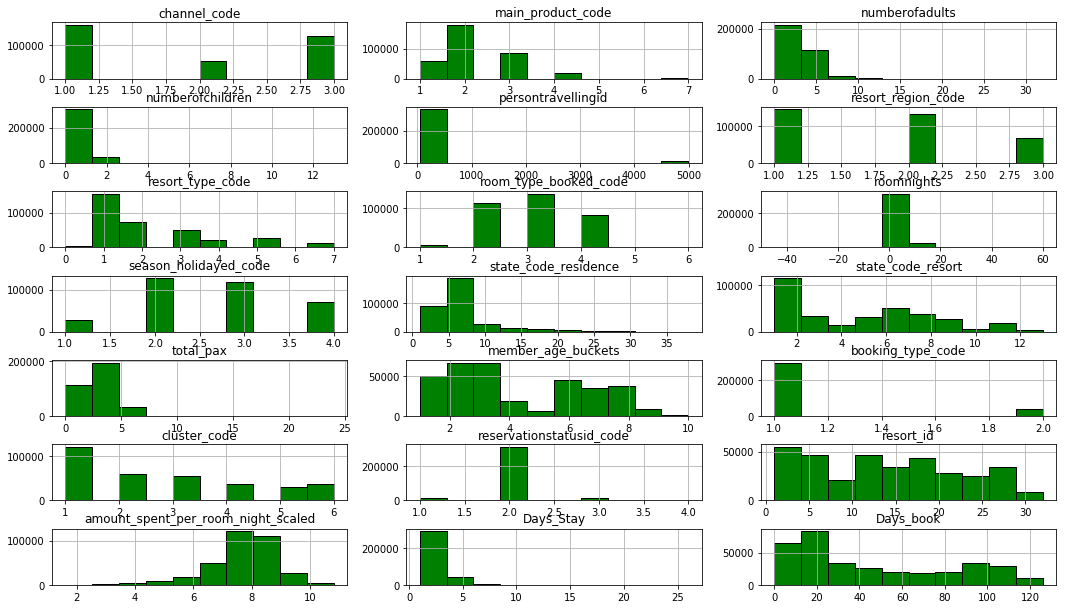

In [113]:
# Again visualising the training data
columns=data1.columns[:]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data1[i].hist(bins=10,edgecolor='black',color='green')
    plt.title(i)
plt.show()
# we can clearly see now visualisation looks fine for training data

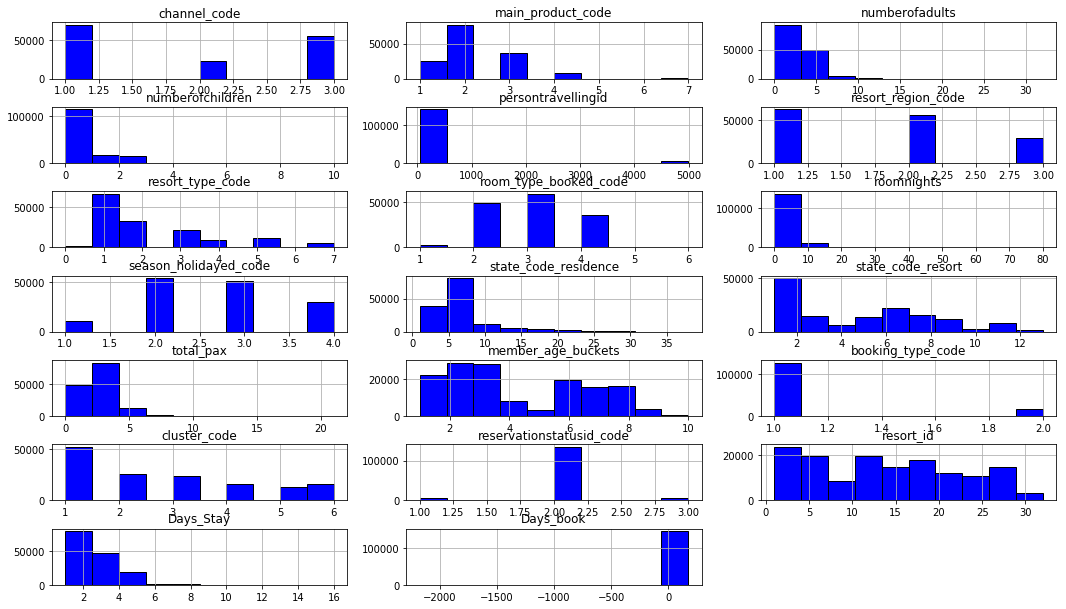

In [114]:
columns=da1.columns[:]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    da1[i].hist(bins=10,edgecolor='black',color='blue')
    plt.title(i)
plt.show()

In [115]:
da1.loc[da1['Days_book']<0]

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,Days_Stay,Days_book
41,3,3,2,0,4752,2,2,2,2,3.0,8.0,2,4,8,1,3,1,32,4,-2177
57,3,1,3,0,45,1,1,3,7,2.0,8.0,4,3,2,2,1,1,12,3,-2169


In [121]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341412 entries, 0 to 341423
Data columns (total 21 columns):
channel_code                          341412 non-null int64
main_product_code                     341412 non-null int64
numberofadults                        341412 non-null int64
numberofchildren                      341412 non-null int64
persontravellingid                    341412 non-null int64
resort_region_code                    341412 non-null int64
resort_type_code                      341412 non-null int64
room_type_booked_code                 341412 non-null int64
roomnights                            341412 non-null int64
season_holidayed_code                 341412 non-null float64
state_code_residence                  341412 non-null float64
state_code_resort                     341412 non-null int64
total_pax                             341412 non-null int64
member_age_buckets                    341412 non-null int64
booking_type_code                     341412 

# Modelling

In [118]:
#importing models through sklearn
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold

In [171]:

train_X=data1.copy()
del train_X['amount_spent_per_room_night_scaled']
test_X=da1.copy()
train_Y=data1['amount_spent_per_room_night_scaled']


In [173]:
print("Train data :",train_X.shape,"\nTrain Output :",train_Y.shape,"\nTest Data :",test_X.shape)

Train data : (341412, 20) 
Train Output : (341412,) 
Test Data : (146765, 20)


In [234]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [236]:
prediction=lin_reg.predict(test_X)

In [237]:
prediction

array([7.79012705, 7.50190995, 7.50417715, ..., 8.01138541, 7.20734473,
       7.51643446])

In [179]:
ab=pd.DataFrame({'amount_spent_per_room_night_scaled':jj})

In [180]:
j['amount_spent_per_room_night_scaled']=ab['amount_spent_per_room_night_scaled']


In [182]:
j.to_csv("sub1.csv",index=None)

In [183]:
j.shape

(102424, 2)

In [184]:
k=pd.read_csv("test.csv")

In [185]:
k.shape

(146765, 23)

In [239]:
x=pd.DataFrame({'amount_spent_per_room_night_scaled':jj})

In [240]:
x.shape

(146765, 1)

In [241]:
x['reservation_id']=k['reservation_id']

In [242]:
x.shape

(146765, 2)

In [243]:
x.to_csv('sub_main.csv',index=None)

In [211]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01,normalize=True, max_iter=1e5)
lassoreg.fit(train_X,train_Y)
y_pred = lassoreg.predict(test_X)

In [212]:
y_pred.shape

(146765,)

In [220]:
pre

array([ 7.95725869,  7.26919012,  7.49792253, ...,  8.20612002,
       11.80632769,  7.53322867])

In [221]:
from sklearn.linear_model import Ridge

In [223]:
clf = Ridge(alpha=1.0)
clf.fit(train_X,train_Y)
pre=clf.predict(test_X)

In [224]:
pre.shape

(146765,)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'